In [25]:
from pycromanager import Core, Studio
from skimage import io as skio
import numpy as np
import matplotlib.pyplot as plt

In [26]:
core = Core()

Once you can capture an image using micro-manager GUI, you can acquire the data using pycro-manager

In [28]:
current_camera = core.get_camera_device()
print(current_camera)

QCamera


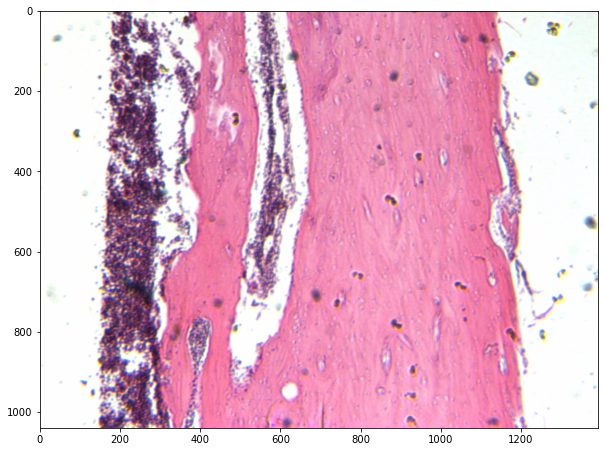

In [32]:
core.snap_image()
tagged_image = core.get_tagged_image() 
if current_camera == 'QCamera': # QCam RGB
    pixels = np.reshape(
        tagged_image.pix, # raw pixels in 1D
        newshape=[tagged_image.tags["Height"], tagged_image.tags["Width"], 4],
        )
    pixels = pixels[:, :, 0:3]
    pixels = np.flip(pixels, 2) # flip the image
else:
    pixels = np.reshape(
        tagged_image.pix,
        newshape=[tagged_image.tags["Height"], tagged_image.tags["Width"]],
        )
fig = plt.figure(figsize=(10, 10))
plt.imshow(pixels)
plt.show()

Read and write MM2 properties

In [ ]:
core.set_property('LED-Dev1ao0', 'Voltage', 5.0) # control the LED intensity, go back and re-snap an image
led_intensity = core.get_property('LED-Dev1ao0', 'Voltage')
print(led_intensity)

Apply MM2 presets

In [ ]:
core.set_config('Imaging', 'LSM') # If a preset is configured in MM2, you can apply it